# EDA

In [123]:
import pandas as pd

In [124]:
base_path = '/content/drive/MyDrive/Colab Notebooks/머신러닝 과제'

In [125]:
train_data = pd.read_csv(base_path + '/data/train_task_3_4.csv')

**train data exploration**

In [126]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382727 entries, 0 to 1382726
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   QuestionId     1382727 non-null  int64
 1   UserId         1382727 non-null  int64
 2   AnswerId       1382727 non-null  int64
 3   IsCorrect      1382727 non-null  int64
 4   CorrectAnswer  1382727 non-null  int64
 5   AnswerValue    1382727 non-null  int64
dtypes: int64(6)
memory usage: 63.3 MB


null check → there is no null-value

In [127]:
train_data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


Check the basic shape and columns of a dataframe

In [128]:
train_data['CorrectAnswer'].value_counts()

3    385401
2    375536
1    363010
4    258780
Name: CorrectAnswer, dtype: int64

In [129]:
train_data['AnswerValue'].value_counts()

3    384002
2    380878
1    338024
4    279823
Name: AnswerValue, dtype: int64

The range of the answer value is from 1 to 4.

In [130]:
train_data.sort_values(by='QuestionId')

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
912504,0,3970,1406664,0,1,2
1268999,0,1110,494458,1,1,1
134266,0,3472,424118,1,1,1
941963,0,2090,231381,1,1,1
1159536,0,2583,1201471,0,1,2
...,...,...,...,...,...,...
297915,947,4006,1059085,0,2,1
662905,947,5288,1351488,0,2,4
429413,947,5022,988943,1,2,2
726723,947,2595,1382585,1,2,2


In [131]:
train_data.sort_values(by='UserId')

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
945966,742,1,266791,1,3,3
1036313,472,1,1131099,0,4,3
441608,626,1,329200,0,2,3
870257,581,1,380741,0,3,2
1278963,391,1,676019,0,4,1
...,...,...,...,...,...,...
1215228,146,6147,1374105,0,4,2
703132,30,6147,78530,1,1,1
1268621,74,6147,1375032,1,1,1
778085,147,6147,38845,1,2,2


It seems that one user has answered multiple questions.

In [132]:
train_data.groupby('QuestionId').count()

,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
QuestionId,,,,,
0,2812,2812,2812,2812,2812
1,14,14,14,14,14
2,2313,2313,2313,2313,2313
3,2672,2672,2672,2672,2672
4,1704,1704,1704,1704,1704
...,...,...,...,...,...
943,2653,2653,2653,2653,2653
944,189,189,189,189,189
945,2337,2337,2337,2337,2337


There are a total of 948 questions with QuestionId ranging from 0 to 947.

# Get Entropy

In [133]:
import scipy.stats as stats

def entropy(x):
  value = x.value_counts(normalize=True)
  return stats.entropy(value)

#### correctness entropy

In [134]:
correctness_entropy = train_data.groupby('QuestionId')['IsCorrect'].agg(entropy)

In [135]:
correctness_entropy

QuestionId
0      0.686739
1      0.682908
2      0.666559
3      0.488020
4      0.673579
         ...   
943    0.684269
944    0.410116
945    0.681035
946    0.689856
947    0.665454
Name: IsCorrect, Length: 948, dtype: float64

data visualization

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

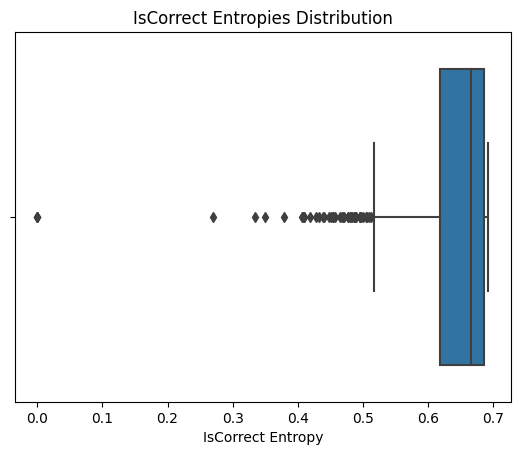

In [137]:
sns.boxplot(x=correctness_entropy)
plt.title('IsCorrect Entropies Distribution')
plt.xlabel('IsCorrect Entropy')
plt.show()

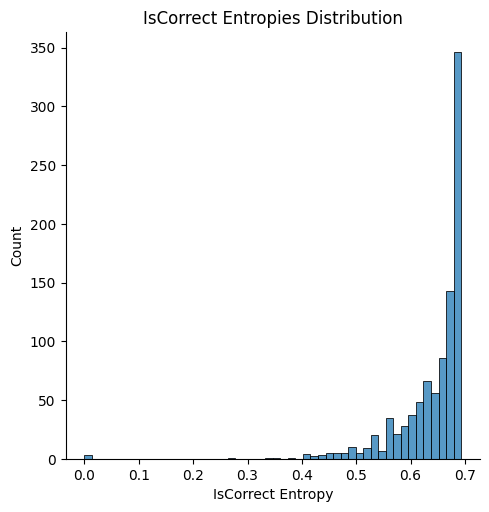

In [138]:
sns.displot(correctness_entropy)
plt.title('IsCorrect Entropies Distribution')
plt.xlabel('IsCorrect Entropy')
plt.show()

#### selection entropy

In [139]:
selection_entropy = train_data.groupby('QuestionId')['AnswerValue'].agg(entropy)

In [140]:
selection_entropy

QuestionId
0      1.194456
1      0.876006
2      1.331663
3      0.695423
4      1.324321
         ...   
943    0.958544
944    1.312404
945    1.260934
946    1.236733
947    1.082614
Name: AnswerValue, Length: 948, dtype: float64

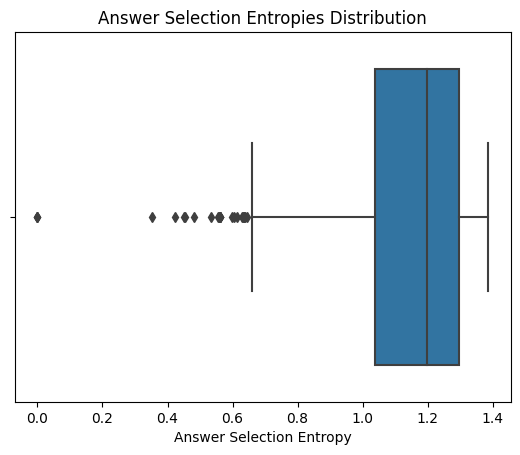

In [141]:
sns.boxplot(x=selection_entropy)
plt.title('Answer Selection Entropies Distribution')
plt.xlabel('Answer Selection Entropy')
plt.show()

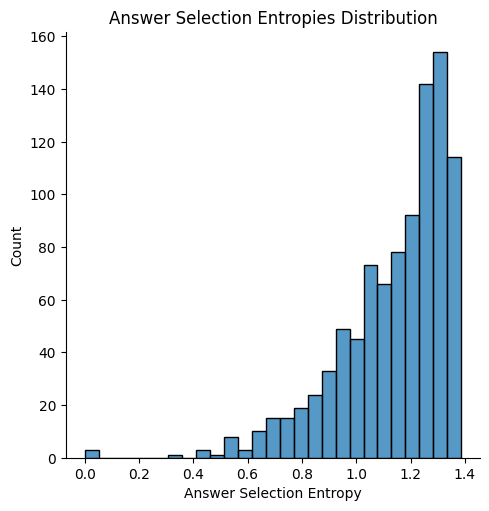

In [142]:
sns.displot(selection_entropy)
plt.title('Answer Selection Entropies Distribution')
plt.xlabel('Answer Selection Entropy')
plt.show()

#### difficulty


In [143]:
train_data.groupby('UserId')['IsCorrect'].mean().reset_index()

,UserId,IsCorrect
0,1,0.419355
1,2,0.366667
2,3,1.000000
3,4,0.681416
4,5,0.606805
...,...,...
4913,6143,0.738462
4914,6144,0.326531
4915,6145,0.494118
4916,6146,0.724382


Get the number of questions

In [144]:
n_questions = len(train_data['QuestionId'].unique())

In [145]:
user2score = {
    user_id: correct_rate for user_id, correct_rate \
        in train_data.groupby('UserId')['IsCorrect'].mean().reset_index().values
}
train_data['UserCorrectRate'] = train_data['UserId'].map(user2score)

l_question_ids = [None] * n_questions
l_difficulties = [None] * n_questions
for i, (question_id, gpby_df) in enumerate(train_data.groupby('QuestionId')):
    mean_diff = (gpby_df['IsCorrect'] - gpby_df['UserCorrectRate']).abs().mean()
    l_question_ids[i] = question_id
    l_difficulties[i] = mean_diff
question_ids = pd.Series(l_question_ids, name='QuestionId')
difficulties = pd.Series(l_difficulties, index=question_ids, name='Difficulty')

In [147]:
difficulties

QuestionId
0      0.428644
1      0.420203
2      0.454473
3      0.409902
4      0.469928
         ...   
943    0.416756
944    0.469772
945    0.442451
946    0.434448
947    0.423807
Name: Difficulty, Length: 948, dtype: float64

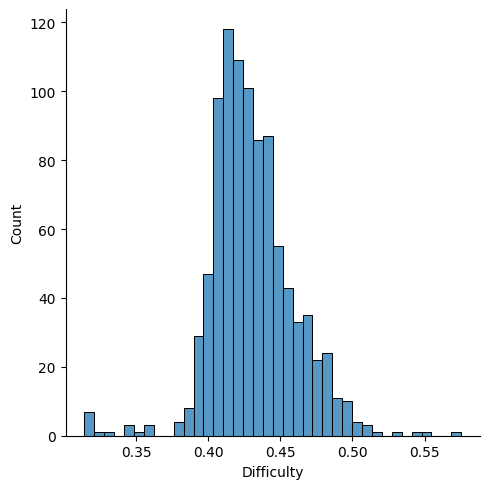

In [148]:
sns.displot(difficulties)

# Subject

In [149]:
question_meta_data = pd.read_csv(base_path + '/data/metadata/question_metadata_task_3_4.csv')
question_meta_data.head()

,QuestionId,SubjectId
0,684,"[3, 71, 98, 209]"
1,87,"[3, 71, 98, 209]"
2,679,"[3, 71, 98, 209]"
3,685,"[3, 71, 98, 209]"
4,222,"[3, 71, 98, 209]"


In [150]:
subject_meta_data = pd.read_csv(base_path + '/data/metadata/subject_metadata.csv')
subject_meta_data.head()

,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2


In [151]:
import ast

subject_data = question_meta_data.sort_values('QuestionId')
subject_data['SubjectList'] = question_meta_data['SubjectId'].apply(ast.literal_eval)
subject_data['SubjectCount'] = subject_data['SubjectList'].apply(len)
subject_data['SubjectScore'] = 10 - subject_data['SubjectCount']
subject_data

,QuestionId,SubjectId,SubjectList,SubjectCount,SubjectScore
215,0,"[3, 32, 40, 245]","[3, 32, 40, 245]",4,6
835,1,"[3, 32, 39, 228]","[3, 32, 39, 228]",4,6
185,2,"[3, 32, 33, 42, 144, 212]","[3, 32, 33, 42, 144, 212]",6,4
131,3,"[3, 32, 42, 211]","[3, 32, 42, 211]",4,6
486,4,"[3, 71, 88, 174]","[3, 71, 88, 174]",4,6
...,...,...,...,...,...
85,943,"[3, 32, 33, 144]","[3, 32, 33, 144]",4,6
729,944,"[3, 32, 37, 221]","[3, 32, 37, 221]",4,6
181,945,"[3, 32, 42, 212]","[3, 32, 42, 212]",4,6
930,946,"[3, 32, 39, 230]","[3, 32, 39, 230]",4,6


In [152]:
subject_data['SubjectCount'].value_counts()

4    934
5     12
6      2
Name: SubjectCount, dtype: int64

In [153]:
subject_score = pd.Series(subject_data['SubjectScore'], name='SubjectScore')
subject_score

215    6
835    6
185    4
131    6
486    6
      ..
85     6
729    6
181    6
930    6
648    6
Name: SubjectScore, Length: 948, dtype: int64

# Calculate ranking

In [154]:
def calculate_rank(series, ascending=False):
  return series.rank(method='first', ascending=ascending).astype('int16')

In [155]:
ranking_data = pd.DataFrame()

- c: correctness
- a: answer selection
- d: difficulties

In [156]:
ranking_data['c'] = calculate_rank(correctness_entropy + subject_score)
ranking_data['a'] = calculate_rank(selection_entropy + subject_score)
ranking_data['d'] = calculate_rank(difficulties + subject_score)
ranking_data

,c,a,d
0,244,477,449
1,290,832,574
2,476,120,166
3,902,895,737
4,400,146,87
...,...,...,...
943,271,769,624
944,924,184,90
945,321,326,260
946,177,390,360


In [157]:
columns = ranking_data.columns.copy()
ranking_data['c+a'] = calculate_rank(
    ranking_data[columns[:2]].mean(axis='columns') + subject_score, ascending=True
)
ranking_data['a+d'] = calculate_rank(
    ranking_data[columns[2:3]].mean(axis='columns') + subject_score, ascending=True
)
ranking_data['c+d'] = calculate_rank(
    ranking_data[[columns[0], columns[2]]].mean(axis='columns') + subject_score, ascending=True
)
ranking_data['all'] = calculate_rank(
    ranking_data[columns[:3]].mean(axis='columns') + subject_score, ascending=True
)

In [158]:
ranking_data

,c,a,d,c+a,a+d,c+d,all
0,244,477,449,386,449,259,425
1,290,832,574,663,574,447,651
2,476,120,166,227,166,205,75
3,902,895,737,906,737,897,909
4,400,146,87,156,87,82,12
...,...,...,...,...,...,...,...
943,271,769,624,627,624,485,646
944,924,184,90,659,90,595,438
945,321,326,260,296,260,149,212
946,177,390,360,183,360,114,230


# Create submission

In [159]:
submission = pd.read_csv(base_path + '/submission/template.csv')
submission

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
943,943,NaN
944,944,NaN
945,945,NaN
946,946,NaN


In [160]:
submission_dir = base_path + '/submission/'

1. correctness

In [175]:
submission_file = 'submission_c'
submission['ranking'] = ranking_data['c']
submission.to_csv(submission_dir + submission_file, index=False)

2. answer selection

In [162]:
submission_file = 'submission_a'
submission['ranking'] = ranking_data['a']
submission.to_csv(submission_dir + submission_file, index=False)

3. difficulties

In [163]:
submission_file = 'submission_d'
submission['ranking'] = ranking_data['d']
submission.to_csv(submission_dir + submission_file, index=False)

4. correctness + answer selection

In [164]:
submission_file = 'submission_c+a'
submission['ranking'] = ranking_data['c+a']
submission.to_csv(submission_dir + submission_file, index=False)

5. answer + difficulties

In [165]:
submission_file = 'submission_a+d'
submission['ranking'] = ranking_data['a+d']
submission.to_csv(submission_dir + submission_file, index=False)

6. correctness + difficulties

In [166]:
submission_file = 'submission_c+d'
submission['ranking'] = ranking_data['c+d']
submission.to_csv(submission_dir + submission_file, index=False)

7. all (correctness + answer selection + difficulties)

In [167]:
submission_file = 'submission_all'
submission['ranking'] = ranking_data['all']
submission.to_csv(submission_dir + submission_file, index=False)

# Evaluation

In [168]:
eval_test = pd.read_csv(base_path + '/data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [169]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

<Axes: >

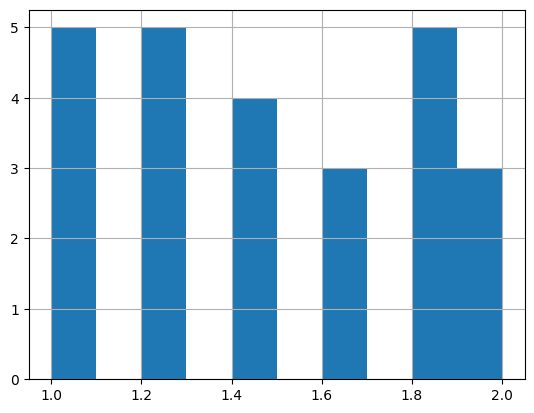

In [170]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [171]:
eval_test['preference'] = calc_preference(eval_test['score'])

In [172]:
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,15,15,145,762,2,2,2,2.0,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1,1.2,1
2,25,25,278,195,1,1,1,1.0,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1,1.2,1


In [173]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)

    return submission_preference

1. correctness

In [176]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2]


In [177]:
#calculate similarity
score_c = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_c

0.48

2. answer selection

In [178]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_a')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]


In [179]:
#calculate similarity
score_a = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_a

0.6

3. difficulties

In [180]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2]


In [181]:
#calculate similarity
score_d = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_d

0.6

4. correctness + answer selection

In [182]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c+a')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2]


In [183]:
#calculate similarity
score_c_a = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_c_a

0.56

5. answer selection + difficulties

In [184]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_a+d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2]


In [185]:
#calculate similarity
score_a_d = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_a_d

0.6

6. correctness + difficulties

In [186]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c+d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2]


In [187]:
#calculate similarity
score_c_d = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_c_d

0.52

7. all

In [188]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_all')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2]


In [189]:
#calculate similarity
score_all = (eval_test['preference'] == evaluate_correctness['preference']).mean()
score_all

0.68

In [190]:
eval_test_pub = pd.read_csv(base_path + '/data/quality_response_remapped_public.csv')
eval_test_pub.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


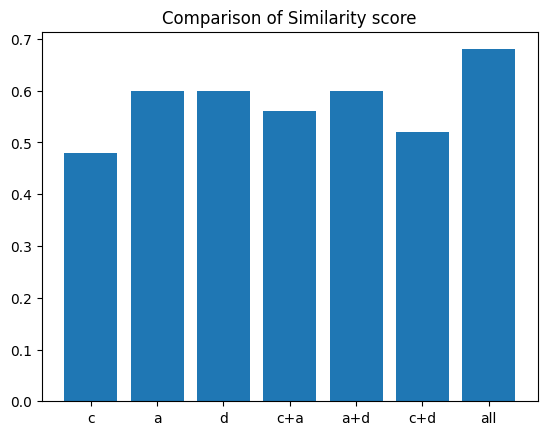

In [191]:
import matplotlib.pyplot as plt

numbers = [score_c, score_a, score_d, score_c_a, score_a_d, score_c_d, score_all]
labels = ['c', 'a', 'd', 'c+a', 'a+d', 'c+d', 'all']

plt.bar(labels, numbers)
plt.title('Comparison of Similarity score')
plt.show()

<Axes: >

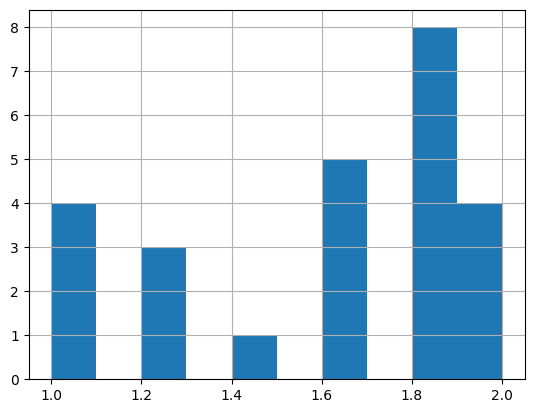

In [192]:
# take the average of scores by 5 evaulators
eval_test_pub['score'] = eval_test_pub.filter(regex='^T', axis = 1).mean(axis=1)
eval_test_pub['score'].hist()

In [193]:
eval_test_pub['preference'] = calc_preference(eval_test_pub['score'])

In [194]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_c = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_c

[2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1]


0.76

In [195]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_a')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_a = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_a

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]


0.84

In [196]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_d = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_d

[2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1]


0.68

In [197]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c+a')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_c_a = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_c_a

[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1]


0.8

In [198]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_a+d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_a_d = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_a_d

[2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1]


0.68

In [199]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_c+d')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_c_d = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_c_d

[2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1]


0.68

In [200]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_all')
evaluate_correctness = pd.DataFrame(evaluate(eval_test_pub, submission_correctness), columns=['preference'])
score_all = (eval_test_pub['preference'] == evaluate_correctness['preference']).mean()
score_all

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1]


0.84

# final comparison

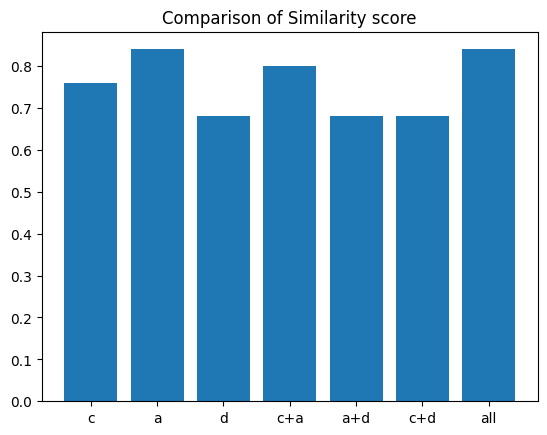

In [201]:
import matplotlib.pyplot as plt

numbers = [score_c, score_a, score_d, score_c_a, score_a_d, score_c_d, score_all]
labels = ['c', 'a', 'd', 'c+a', 'a+d', 'c+d', 'all']

plt.bar(labels, numbers)
plt.title('Comparison of Similarity score')
plt.show()